# FIR Delay effect

In [10]:
import numpy as np
import scipy as sp  
from scipy.fft import fft, fftfreq, fftshift
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt


In [3]:
def load_file(file):
    fs, data = wav.read(file)
    nsamples = data.shape[0]
    Time = np.arange(nsamples) / fs

    return data, fs,Time, nsamples


def plot_waveform(data, fs, Time, nsamples):
    plt.figure(figsize=(20, 5))
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.plot(Time, data, label='Waveform')
    plt.show()

In [4]:
sr, signal = wav.read('string_1.wav')
data, fs, Time, nsamples = load_file('string_1.wav')

# Determining the Impulse Response

---

We have the equation of the FIR filter:
$$ s[t] = e[t] + \alpha e[t-D] $$

We know that the impulse response is the output of the filter when the input is a dirac. If we call the impulse response $$ h[t]$$, and $$ \delta [t]$$ the dirac, we have:

$$ h[t] = s[t] = e[t] + \alpha e[t-D] = \delta[t] + \alpha \delta[t-D] $$

So, the impulse response is given by:

$$ h[t] = \delta[t] + \alpha \delta[t-D] $$

---


# Numerical form of the impulse response

/var/folders/ck/fpkhb7ks5q37gh4f62qz4gs40000gn/T/ipykernel_1715/2186745074.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h, use_line_collection=True)


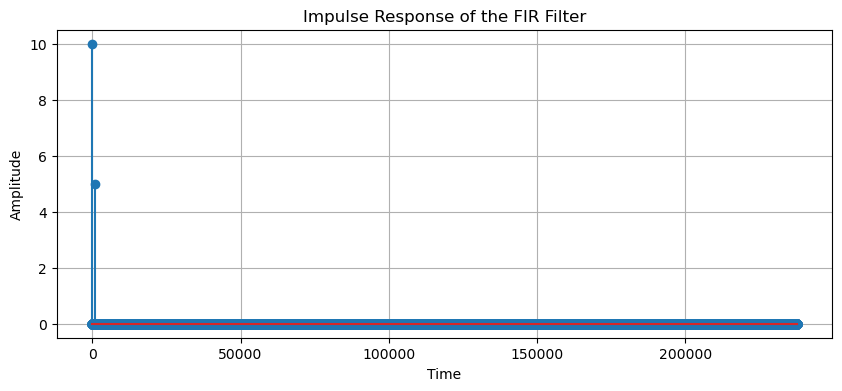

In [12]:
delta = np.zeros(len(Time))
delta[0] = 10
alpha = 0.5

D = 1000

h = np.zeros_like(delta)
for t in range(len(Time)):
    h[t] = delta[t] + alpha * delta[t - D]

plt.figure(figsize=(10, 4))
plt.stem(h, use_line_collection=True)
plt.title('Impulse Response of the FIR Filter')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Frequency response of the filter

We know that the Fourier transform of $$\delta(t)  = 1$$ 
and the Fourier transform of $$\delta(t-D) = e^{-i 2\pi D}$$
Thus, the Fourier transform of the impulse response is given by:

$$ H(v) = 1 + \alpha e^{-i 2\pi D} $$

Which is the frequency response of the filter.


# Numerical form of the frequency response

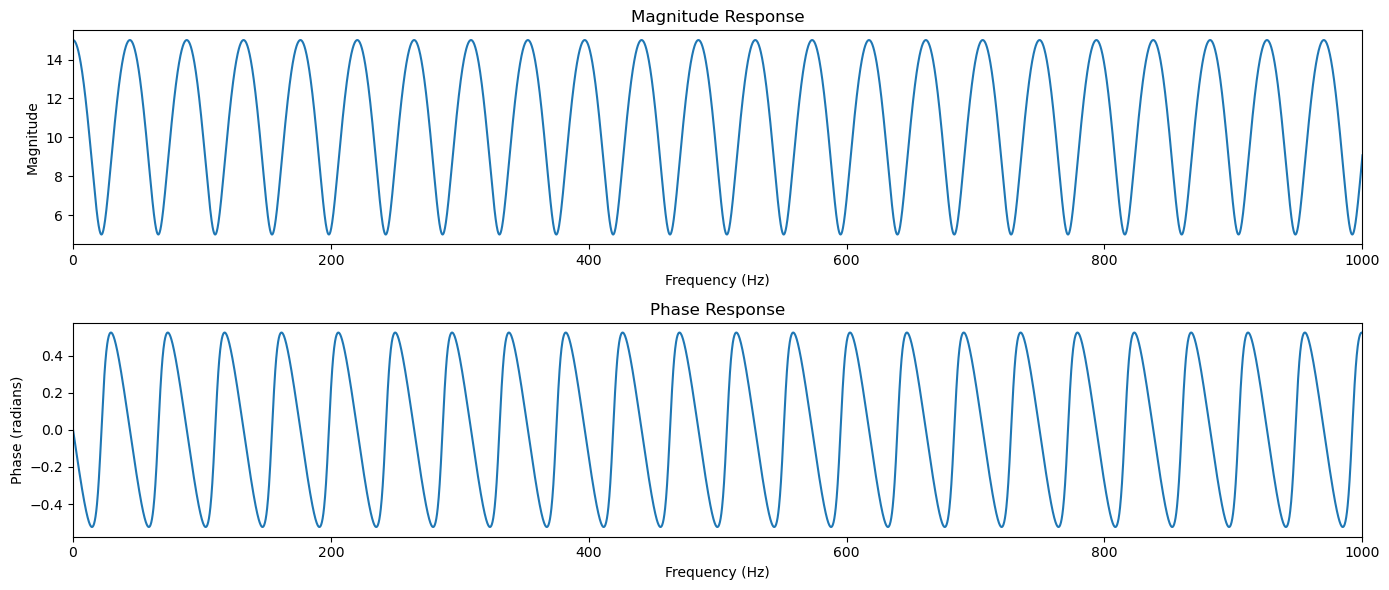

In [13]:
# Computing the frequency response using FFT
H = fftshift(fft(h))
frequencies = fftshift(fftfreq(len(h), d=1/fs))

plt.figure(figsize=(14, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(H))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim((0,1000))

# Phase plot
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.angle(H))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.xlim((0,1000))

plt.tight_layout()
plt.show()

# Implementation of the delay effect

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


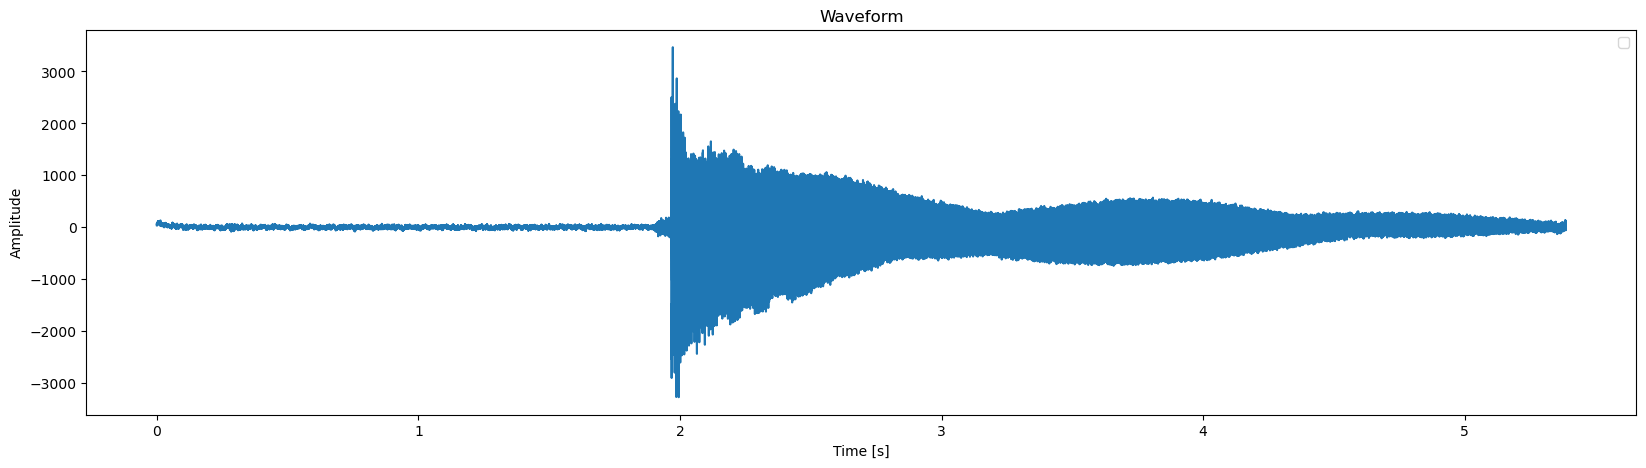

In [14]:
#plotting the waveform of the signal
plot_waveform(data, fs, Time, nsamples)

# Applying the filter

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


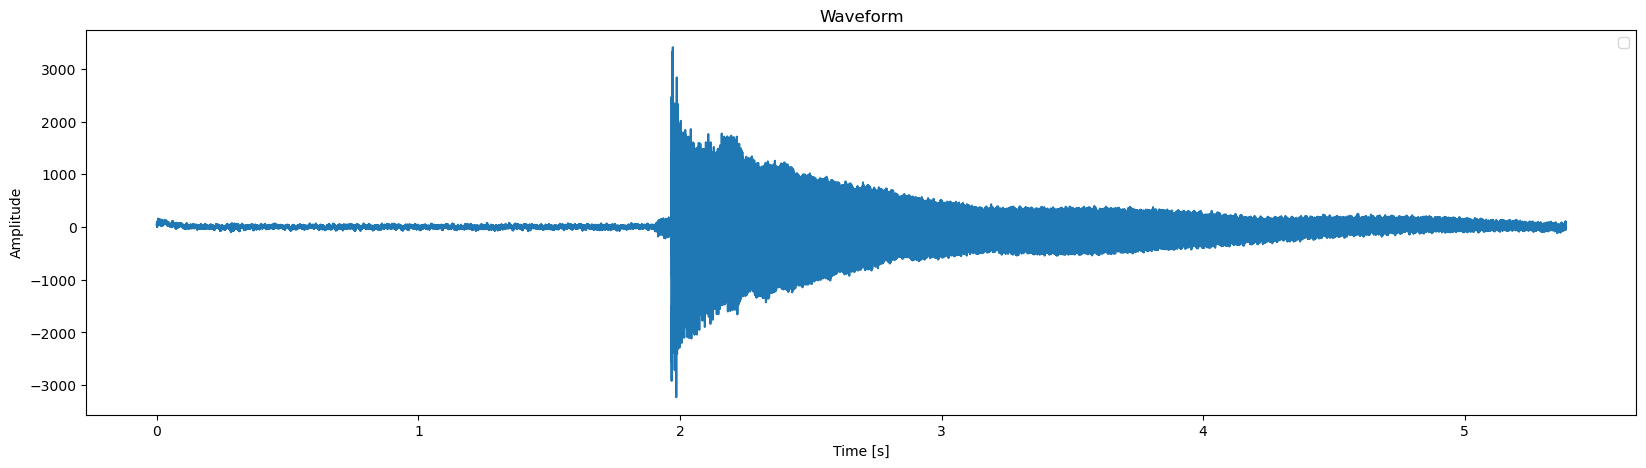

In [15]:
output = np.zeros(data.shape)

for t in range(len(data)):
    output[t] = data[t] + alpha * data[t-D]

#plotting the waveform of the signal with delay

plot_waveform(output, fs, Time, nsamples)
    